In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/car_price_predictor-master/car_price_predictor-master/quikr_car.csv')
#df = pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


1. Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [14]:
df.name.unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [15]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [16]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [17]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [18]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)


Quality

    names have company names attached to it even though a seperate column   has company names
    some names like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
    company: many of the names are not of any company like 'Used', 'URJENT', and so on.
    year has many non-year values
    year is in object. Change to integer
    Price has Ask for Price
    Price has commas in its prices and is in object
    kms_driven has object values with kms at last.
    It has nan values and two rows have 'Petrol' in them
    fuel_type has nan values



In [19]:
df['Price'] = df['Price'].str.replace(',','')
df = df[df['Price']!= 'Ask For Price']
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,310000,NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [20]:
df =  df[df['Price'].str.isnumeric()]
df =  df[df['year'].str.isnumeric()]

In [21]:
df['Price'] = df['Price'].astype(int)
df['year'] = df['year'].astype(int)

In [22]:
df['kms_driven'] = df['kms_driven'].str.replace(',','')
df['kms_driven'] = df['kms_driven'].str.replace(' kms','')

In [23]:
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

In [24]:
df[df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [25]:
df = df[df['fuel_type'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [26]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

### All company names look fine now. During the previous cleaning steps erroneous company names also got removed.

Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [27]:
def threewords(string):
  a = string.split()[:3]
  return ' '.join(a)

In [28]:
df['name'] = df['name'].apply(threewords)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


2. E.D.A.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

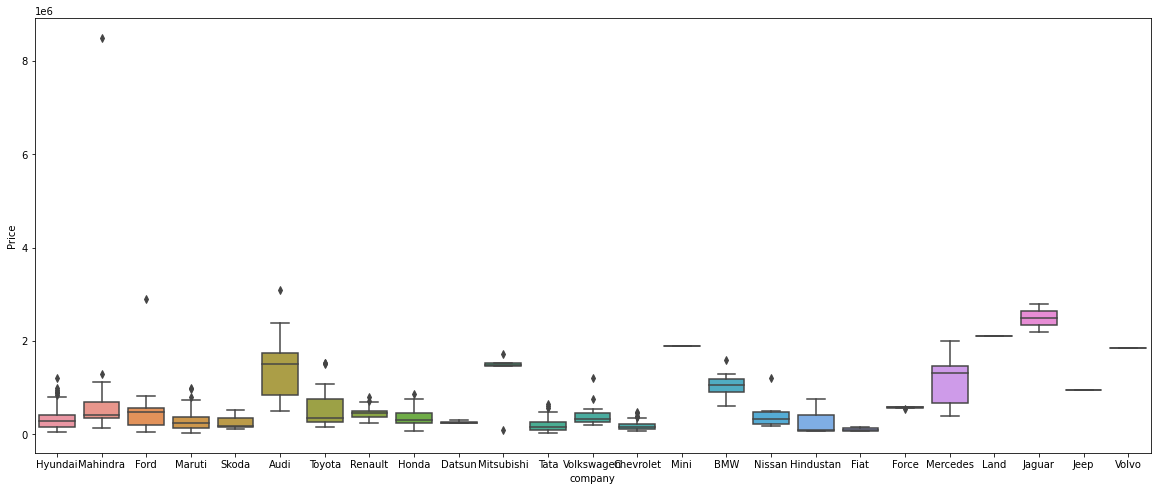

In [30]:
plt.subplots(figsize=(20,8))
sns.boxplot(x='company',y='Price', data=df);

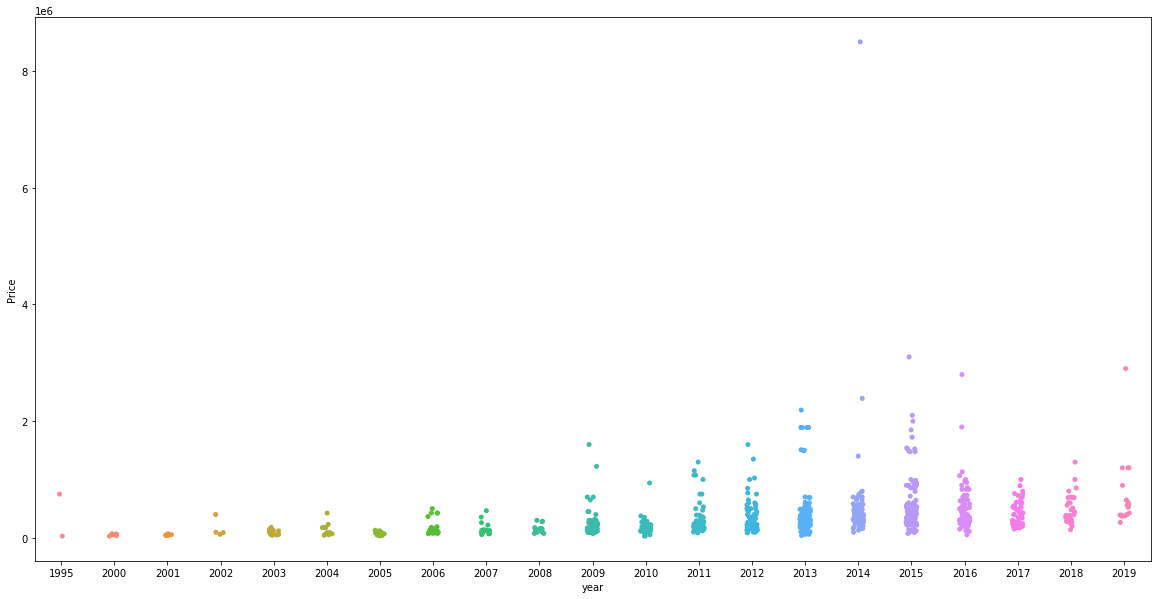

In [31]:
plt.subplots(figsize=(20,10))
sns.stripplot(x='year',y='Price',data=df)
plt.show()

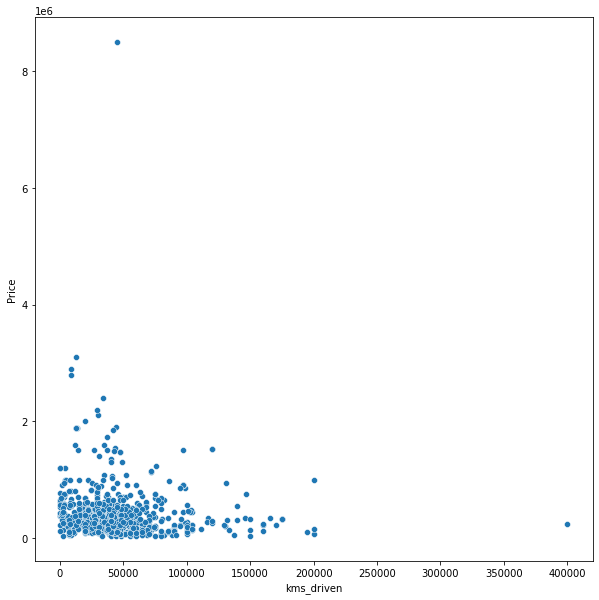

In [32]:
plt.subplots(figsize = (10,10))
sns.scatterplot(x='kms_driven', y='Price', data = df);

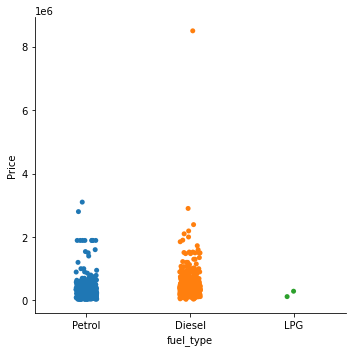

In [33]:
sns.catplot(x='fuel_type', y='Price', data = df);

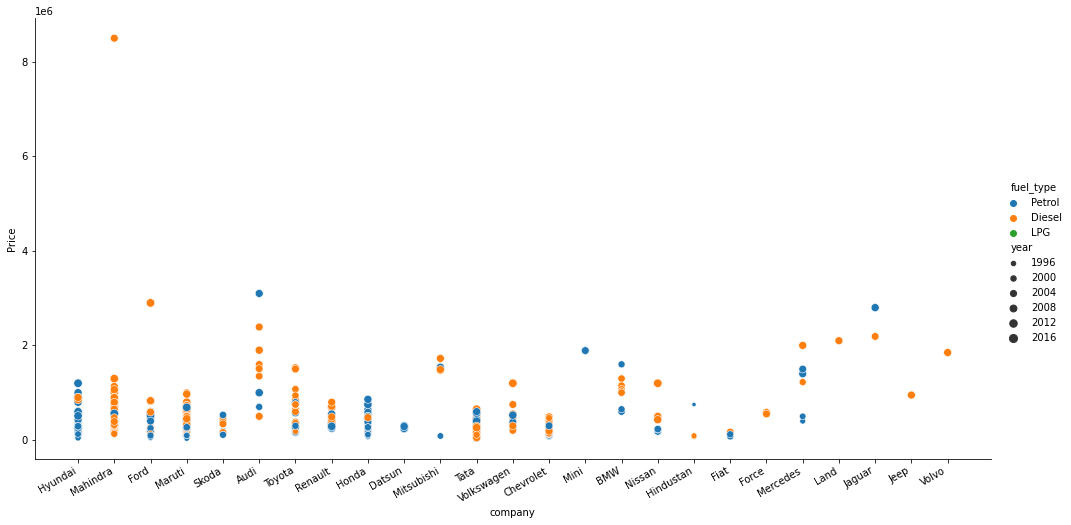

In [34]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=30,ha='right');

In [35]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


assigning dependent and independent variables.

In [37]:
X = df.drop('Price', axis=1)
X1 = pd.get_dummies(X)
y = df['Price']

In [38]:
# let's find important feature using ExtraTreesRegressor model 

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X1, y)
important_features = etr.feature_importances_

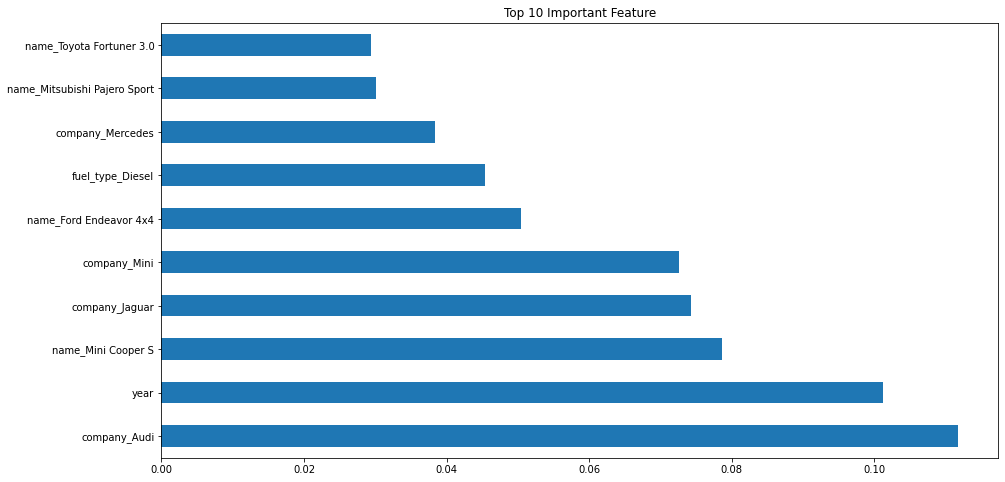

In [39]:
# let's get top important features

important_features = pd.Series(important_features, index = X1.columns).sort_values(ascending = False)
# let's plot top 10 important feature

plt.figure(figsize = (15, 8))
important_features[:10].plot(kind = "barh")
plt.title("Top 10 Important Feature");

Year is the most important feature. Few of the company names and model names affect the price more than fuel type and kms dirven as per above plot.

####3.  Train test split

In [40]:
# let's divide our data into train and test part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Importing algorithms for training

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


Creating an OneHotEncoder object to contain all the possible categories


In [42]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [43]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [44]:
# creating a function to check the performance of various ML algorithms.

def pipeline(model):
  pipe=make_pipeline(column_trans,model)
  pipe.fit(X_train,y_train)
  y_pred=pipe.predict(X_test)
  return r2_score(y_test,y_pred)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [46]:
lr = LinearRegression()
rfr_rand = RandomizedSearchCV(RandomForestRegressor(),{'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
                                                             'max_features': ['auto', 'sqrt'], 'max_depth': [int(x) for x in np.linspace(5, 30, 3)],
                                                             'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},n_iter = 10, n_jobs = -1)
xgb_rand = RandomizedSearchCV(XGBRegressor(),{'max_depth':[ x for x in range(1,10,2)], 'learning_rate':[0.1,0.2,0.3],
                                                        'n_estimators':[int(x) for x in np.linspace(100,1200,15)],
                                                      'booster':['gbtree','gblinear'] },n_iter = 10, n_jobs = -1 )

In [47]:
lr_score = pipeline(lr)

In [48]:
rfr_score = pipeline(rfr_rand)

In [49]:
xgb_score = pipeline(xgb_rand)

[19:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
lr_score, rfr_score, xgb_score

(0.6751115676456724, 0.5800337358923252, 0.5369677176525592)

Pipeline with linear regression model gave the best result.
Finding the model with a random state of TrainTestSplit where the model gives the best r2_score.

In [51]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [52]:
np.argmax(scores)

655

In [53]:
scores[np.argmax(scores)]

0.920087093218515

Training the model with train test split with random state = 655

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=655)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.920087093218515

In [55]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416107.38610967])

Saving the Linear Regression model for the app development.

In [56]:
import pickle as pkl

with open('LinearRegression.pkl','wb') as f:
  pkl.dump(pipe,f)